## Salary Distribution by Job title

### Importing libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Filter the data for United States and drop the null values

In [ ]:
df_US = df[(df['job_country'] =='United States')].dropna(subset=['salary_year_avg'])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


### Get the top 6 jobs by count

In [ ]:
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

### Filter the data with the top 6 job titles

In [ ]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

### Calculate the median salary for each job and sort them

In [ ]:
job_top6_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

### Plot the salary distribution of Data jobs in US

Text(0, 0.5, '')

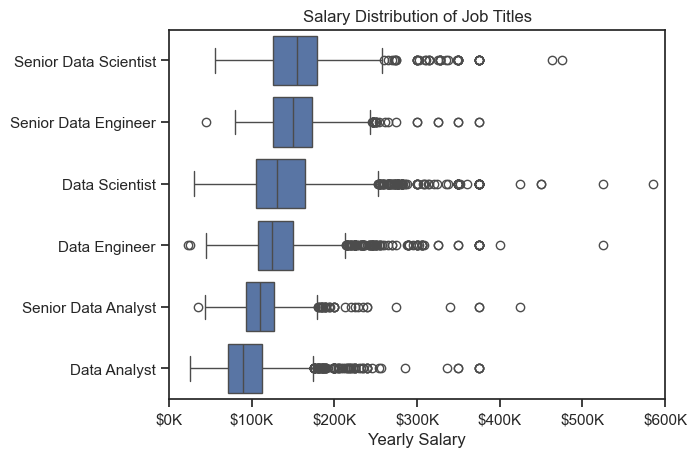

In [ ]:
sns.boxplot(df_US_top6, x='salary_year_avg', y='job_title_short', order=job_top6_order)
sns.set_theme(style='ticks')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.title('Salary Distribution of Job Titles')
plt.xlim(0,600000)
plt.xlabel('Yearly Salary')
plt.ylabel('')

## Median Salary Vs Skills for Data Analysts

### Filter the Data Analyst jobs in United States

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] =='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

### Explode the skills

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']].head(6)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint


### Group by job skills to get median salary and count of skills for each job

Get the top 10 top paid jobs.

In [ ]:
df_DA_US_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_US_top_pay = df_DA_US_top_pay.head(10)

Get the top demanded skills.

In [ ]:
df_DA_US_top_skill = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_US_top_skill = df_DA_US_top_skill.head(10).sort_values(by='median',ascending=False)

### Plot the median salary vs skills comparison

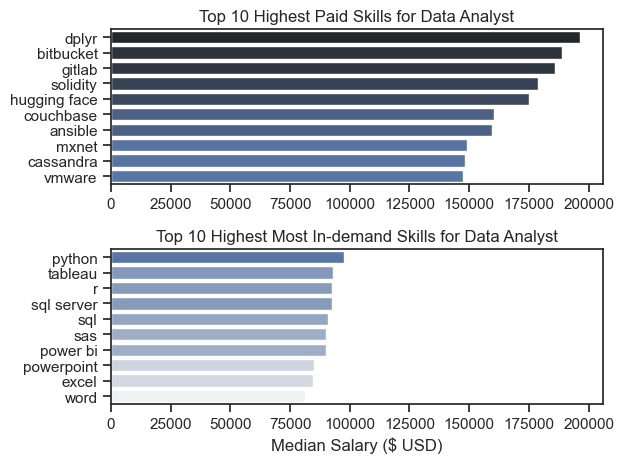

In [ ]:
fig , ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
#df_DA_US_top_pay.plot(kind='barh', y ='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_US_top_pay, x='median',y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette="dark:b_r", legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

#df_DA_US_top_skills.plot(kind='barh', y ='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_US_top_skill, x='median',y=df_DA_US_top_skill.index, ax=ax[1], hue='median', palette="light:b", legend=False)
ax[1].set_title('Top 10 Highest Most In-demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()